<a href="https://colab.research.google.com/github/JuanMartinez04/Digital_signal_processing_JDMS/blob/main/PDS_20_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FFT de una señal, reconstrucción a partir del espectro usando la IFFT, filtro pasa banda en frecuencia.


Hecho por Juan David Martínez Sánchez

In [1]:
#librerías
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [2]:
#definimos nuestra señal
frecs=[20,30,40,50,60,70,80,90,100]
fs=512
tf=1
t =np.linspace(0,tf,tf*fs)
signal=np.sin(2*np.pi*10*t)
#hacemos la combinación lineal de todas las frecuencias
for frec in frecs:
  s_i= np.sin(2*np.pi*frec*t)
  signal= signal+s_i

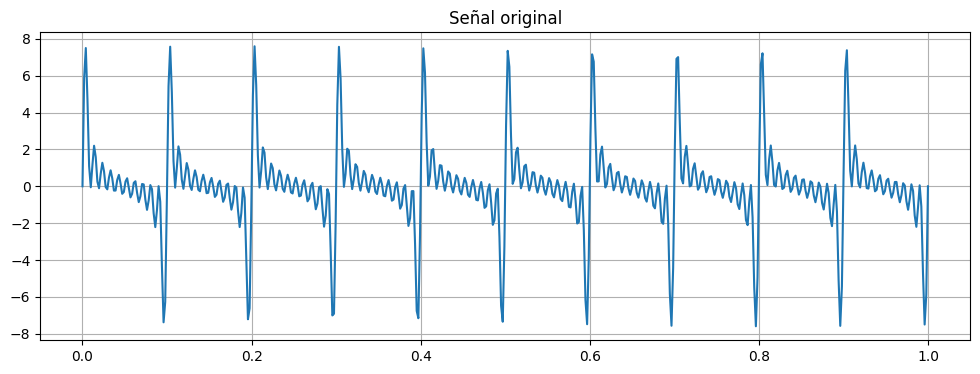

In [3]:
#visualizamos la señal sin ruido
plt.figure(figsize =(12,4))
plt.title('Señal original')
plt.plot(t,signal)
plt.grid()

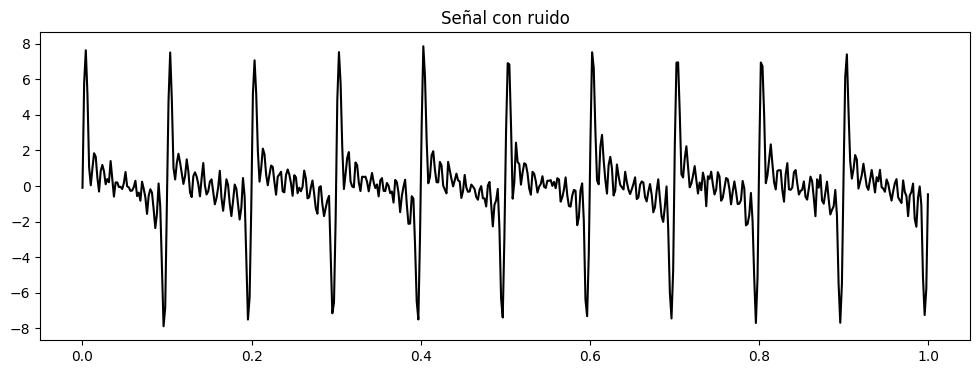

In [4]:
#hacemos el ruido blanco gaussiano
rbg= np.random.normal(size=len(signal),scale=0.3)
signal_rbg=signal+rbg
#visualizamos
plt.figure(figsize =(12,4))
plt.title('Señal con ruido')
plt.plot(t,signal_rbg,'black')

In [5]:
#calculamos la fft de la señal
fft_s= sc.fft.fft(signal)
frecs_fft = sc.fft.fftfreq(len(signal),1/fs)
#calculamos la fft de la señal con ruido
fft_s_rbg= sc.fft.fft(signal_rbg)
frecs_fft = sc.fft.fftfreq(len(signal),1/fs)

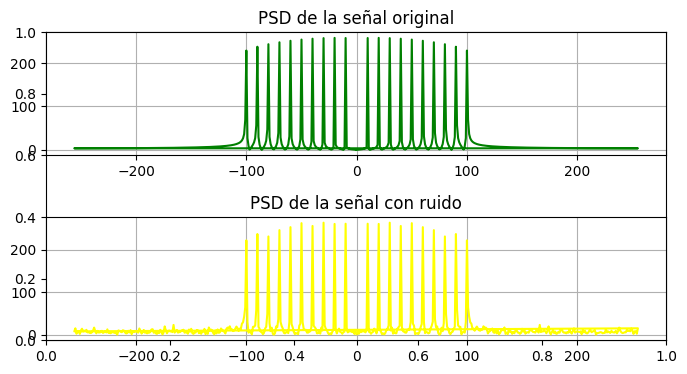

In [12]:
#visualizamos el espectro de potencia
plt.figure(figsize =(8,4))
plt.title('PSD de la señal original')
plt.subplot(2,1,1)
plt.plot(frecs_fft,np.abs(fft_s),'green')
plt.grid()
plt.subplot(2,1,2)
plt.title('PSD de la señal con ruido')
plt.plot(frecs_fft,np.abs(fft_s_rbg),'yellow')
plt.grid()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [7]:
#reconstruimos la señal
signal_R= sc.fft.ifft(fft_s)
#recinstruir la señal con ruido
signal_R_rbg= sc.fft.ifft(fft_s_rbg)

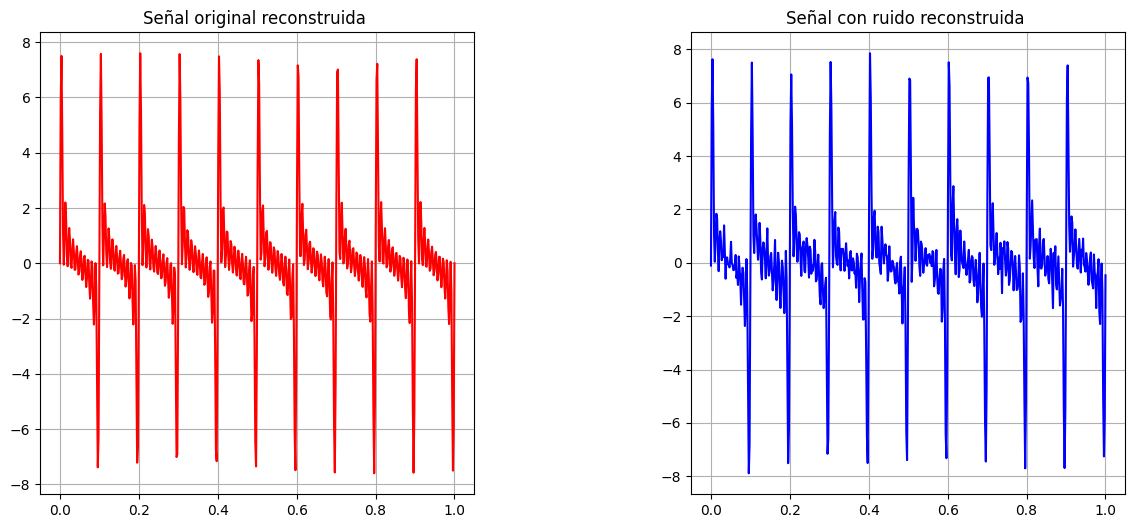

In [14]:
#visualizamos la señal reconstruida
plt.figure(figsize =(14,6))
plt.subplot(1,2,1)
plt.title('Señal original reconstruida ')
plt.plot(t,signal_R,'red')
plt.grid()
plt.subplot(1,2,2)
plt.title('Señal con ruido reconstruida ')
plt.plot(t,signal_R_rbg,'blue')
plt.grid()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [9]:
#definimos el filtro en el domino de la frecuencia
def filt(frecs,frec_0:0,frec_1):
  '''
  function for a bandpass filter

  params
  frecs: frequencies vector
  frec_0: lower frequency
  frec_1: cut frequency
  '''
  filt_v=np.zeros_like(frecs)
  filt_v[(frecs>=frec_0)&(frecs<=frec_1)]=1
  filt_v[(frecs<=-frec_0)&(frecs>=-frec_1)]=1
  return filt_v



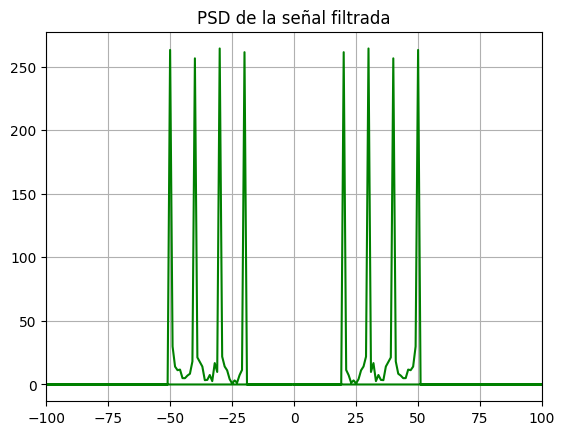

In [10]:
#Aplicamos el filtro a la señal para dejar pasar la señal de 20 a 50hz
filtro=filt(frecs_fft,20,50)
fft_signal_filt= fft_s_rbg*filtro
plt.title('PSD de la señal filtrada')
plt.plot(frecs_fft,np.abs(fft_signal_filt),'green')
plt.xlim(-100,100)
plt.grid()

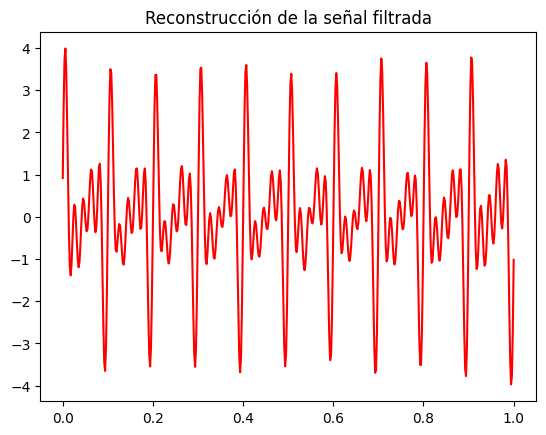

In [15]:
#Reconstruimos la señal filtrada de tres componentes
signal_filt= sc.fft.ifft(fft_signal_filt)
#visualizamos la señal resultante
plt.title('Reconstrucción de la señal filtrada')
plt.plot(t,signal_filt,'red')